x*(-639811*x**8 + 32920945*x**7 - 692076080*x**6 + 7689047350*x**5 - 48666750215*x**4 + 174259306993*x**3 - 319383269830*x**2 + 226579852200*x + 2372760000000)/31636800000

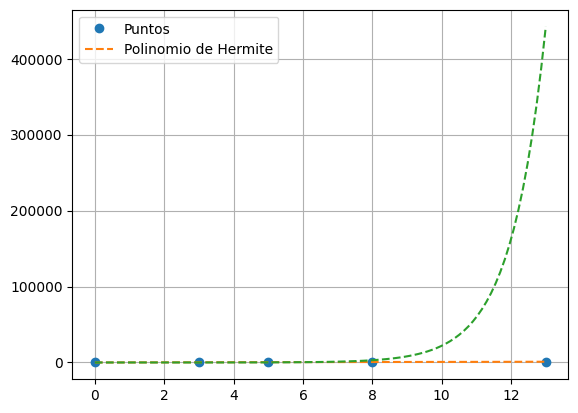

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
def hermite_interpolation(x_points, y_points, derivatives):

    x = sp.symbols('x')  # Variable simbólica
    n = len(x_points)      # Número de puntos de interpolación
    H = 0                   # Inicializar el polinomio de Hermite

    for i in range(n):
        # Polinomio de Lagrange h_i(x)
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])

        # Derivada de L_i(x) evaluada en x_i
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])

        # Términos del polinomio de Hermite
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]

        # Sumar el término al polinomio total
        H += term1 + term2

    return sp.simplify(H)



x_points = np.array([0, 3, 5, 8, 13])  # tiempo
y_points = np.array([0, 225, 383, 623, 993]) # distancia
derivatives = np.array([75, 77, 80, 74, 72])  #  velocidd

hermite_poly = hermite_interpolation(x_points, y_points, derivatives)
display(hermite_poly)
hermite_function = sp.lambdify(sp.symbols('x'), hermite_poly, 'numpy')

# Grafico
x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = hermite_function(x_interp)
plt.plot(x_points, y_points, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Hermite')
plt.plot(x_interp, np.exp(x_interp), '--', label='')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()

Hermite
Posición en t=10s: 742.5028 m
Velocidad en t=10s: 48.3817 m/s
Velocidad máxima: 119.4163 m/s en t = 12.3754 s
Spline Cubico
Posición en t=10s: 774.8639 m
Velocidad en t=10s: 74.1610 m/s
Velocidad máxima: 80.6801 m/s en t = 5.8038 s


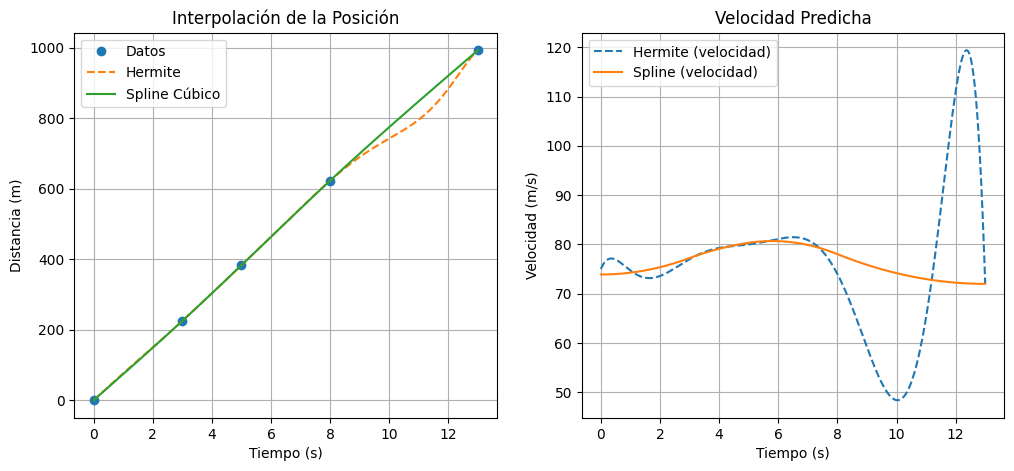

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 1. Interpolación de Hermite

def hermite_interpolation(x_points, y_points, derivatives):
    x = sp.symbols('x')  # Variable simbólica
    n = len(x_points)    # Número de puntos
    H = 0                # Polinomio de Hermite

    for i in range(n):
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]
        H += term1 + term2

    return sp.simplify(H)

# Datos del problema
x_points = np.array([0, 3, 5, 8, 13])         # Tiempo
y_points = np.array([0, 225, 383, 623, 993])  # Distancia
derivatives = np.array([75, 77, 80, 74, 72])  # Velocidad

# Obtener polinomio de Hermite
hermite_poli = hermite_interpolation(x_points, y_points, derivatives)

x = sp.symbols('x')
hermite_funcion = sp.lambdify(x, hermite_poli, 'numpy')
hermite_deriv_funcion = sp.lambdify(x, sp.diff(hermite_poli, x), 'numpy')

# Evaluo en t = 10
t_eval = 10
pos_hermite_10 = hermite_funcion(t_eval)
vel_hermite_10 = hermite_deriv_funcion(t_eval)

# Velocidad máxima (Hermite)
x_vals = np.linspace(0, 13, 1000)
vel_vals_hermite = hermite_deriv_funcion(x_vals)
vel_max_hermite = np.max(vel_vals_hermite)
t_max_hermite = x_vals[np.argmax(vel_vals_hermite)]

print("Hermite")
print(f"Posición en t=10s: {pos_hermite_10:.4f} m")
print(f"Velocidad en t=10s: {vel_hermite_10:.4f} m/s")
print(f"Velocidad máxima: {vel_max_hermite:.4f} m/s en t = {t_max_hermite:.4f} s")

#Interpolacion con Spline

spline = CubicSpline(x_points, y_points, bc_type='natural')

# Evaluar en t = 10
pos_spline_10 = spline(t_eval)
vel_spline_10 = spline.derivative()(t_eval)

# Velocidad máxima (Spline)
vel_vals_spline = spline.derivative()(x_vals)
vel_max_spline = np.max(vel_vals_spline)
t_max_spline = x_vals[np.argmax(vel_vals_spline)]

print("Spline Cubico")
print(f"Posición en t=10s: {pos_spline_10:.4f} m")
print(f"Velocidad en t=10s: {vel_spline_10:.4f} m/s")
print(f"Velocidad máxima: {vel_max_spline:.4f} m/s en t = {t_max_spline:.4f} s")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_points, y_points, 'o', label='Datos')
plt.plot(x_vals, hermite_funcion(x_vals), '--', label='Hermite')
plt.plot(x_vals, spline(x_vals), '-', label='Spline Cúbico')
plt.title('Interpolación de la Posición')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.legend()
plt.grid(True)

# Velocidad
plt.subplot(1, 2, 2)
plt.plot(x_vals, vel_vals_hermite, '--', label='Hermite (velocidad)')
plt.plot(x_vals, vel_vals_spline, '-', label='Spline (velocidad)')
plt.title('Velocidad Predicha')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.grid(True)
plt.show()


2.

<ipython-input-4-55a8947ed6d4>:25: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_val - x[i - 1])


g(5000 m) ≈ 9.794654 m/s²
g(42000 m) ≈ 9.681859 m/s²
g(90000 m) ≈ 9.540337 m/s²


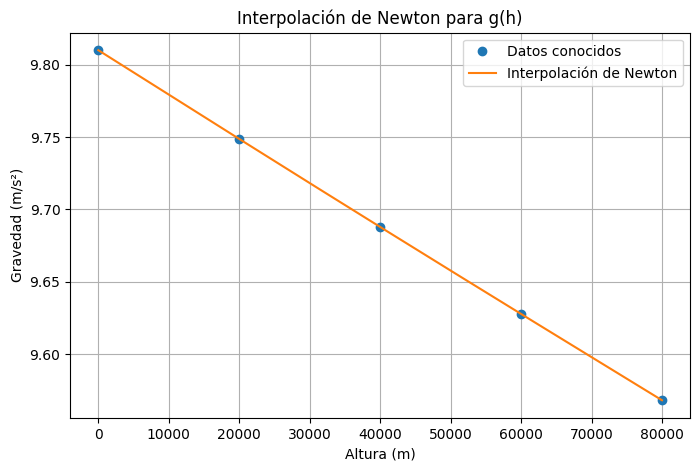

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diferencia_dividida(x, y, i, j):
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
    coef = coeficientes_a(x, y)
    def P(x_val):
        resultado = coef[0]
        producto = 1
        for i in range(1, len(x)):
            producto *= (x_val - x[i - 1])
            resultado += coef[i] * producto
        return resultado
    return P

# Datos
x = np.array([0, 20000, 40000, 60000, 80000])  # altura en metros
y = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # gravedad

# Crear el polinomio de interpolacion
P_n = Polinomio_Newton(x, y)

# Estimar gravedad a alturas dadas
alturas_objetivo = [5000, 42000, 90000]
valores_estimados = [P_n(h) for h in alturas_objetivo]

# Mostrar resultados
for alt, val in zip(alturas_objetivo, valores_estimados):
    print(f"g({alt} m) ≈ {val:.6f} m/s²")

# Graficar polinomio y puntos originales
x_interpo = np.linspace(min(x), max(x), 300)
y_interpo = [P_n(xi) for xi in x_interpo]

plt.figure(figsize=(8,5))
plt.plot(x, y, 'o', label='Datos conocidos')
plt.plot(x_interpo, y_interpo, label='Interpolación de Newton')
plt.xlabel('Altura (m)')
plt.ylabel('Gravedad (m/s²)')
plt.title('Interpolación de Newton para g(h)')
plt.legend()
plt.grid(True)
plt.show()


3.

Para una teemperatura de 250K, se tiene una densidad de 1.3975329155606775
Para una teemperatura de 800K, se tiene una densidad de 0.4964089902361964
Para una teemperatura de 3000K, se tiene una densidad de 1561.165866794854


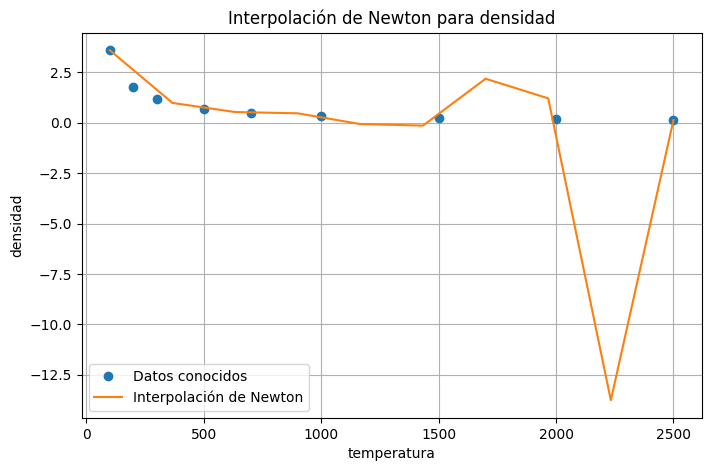

In [ ]:
def diferencia_dividida(x,y,i,j):
  if i==j:
    return y[i]
  else:
    num=diferencia_dividida(x,y,i+1,j)-diferencia_dividida(x,y,i,j-1)
    den=x[j]-x[i]
    return num/den
def coeficientes_a(x,y):
  n=len(x)
  coeficientes=np.zeros_like(x,dtype=float)
  for i in range(n):
    coeficientes[i]=diferencia_dividida(x,y,0,i)
  return coeficientes
def Polinomio_Newton(x,y):
  coef=coeficientes_a(x,y)
  def P(x_val):
    resultado = coef[0]
    producto = 1.
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P
x = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # T en K
y = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) #rho
P_n=Polinomio_Newton(x,y)

temperaturas=[250,800,3000]
densidades= [P_n(T) for T in temperaturas]

for tem,val in zip(temperaturas,densidades):
  print(f'Para una teemperatura de {tem}K, se tiene una densidad de {val}')

x_interpo = np.linspace(100, 2500, 10)
y_interpo = [P_n(xi) for xi in x_interpo]

plt.figure(figsize=(8,5))
plt.plot(x, y, 'o', label='Datos conocidos')
plt.plot(x_interpo, y_interpo, label='Interpolación de Newton')
plt.xlabel('temperatura')
plt.ylabel('densidad')
plt.title('Interpolación de Newton para densidad')
plt.legend()
plt.grid(True)
plt.show()

Voltaje estimado a 139.27 Ω: -0.37016 V


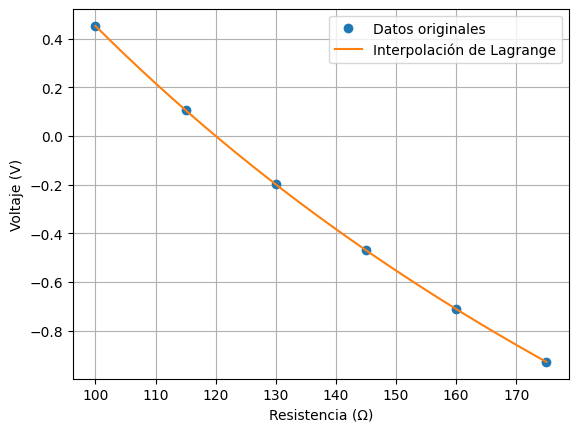

In [ ]:
def Lagrange(x, y, x_interp):

  if len(x) != len(y):
    raise ValueError('x e y deben tener la misma longitud')
  if np.isscalar(x_interp):
    if x_interp < min(x) or x_interp > max(x):
        raise ValueError('x_interp debe estar dentro del rango de x')
  else:
    if np.any(x_interp < min(x)) or np.any(x_interp > max(x)):
        raise ValueError('x_interp debe estar dentro del rango de x')
  n = len(x)
  P = 0
  for i in range(n):
    l = 1
    for j in range(n):
      if i != j:
        l *= (x_interp - x[j]) / (x[i] - x[j])
    P += y[i] * l
  return P
# Datos reales del RTD
resistencia = np.array([100, 115, 130, 145, 160, 175])
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])
r_objetivo = 139.27
v_estimado = Lagrange(resistencia, voltaje, r_objetivo)
print(f"Voltaje estimado a 139.27 ohm: {v_estimado:.5f} V")

x_interp = np.linspace(100, 175, 200)
y_interp = Lagrange(resistencia, voltaje, x_interp)


plt.plot(resistencia, voltaje, 'o', label='Datos originales')
plt.plot(x_interp, y_interp, label='Interpolación de Lagrange')

plt.legend()
plt.xlabel('Resistencia (Ω)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()

5.

Índice de refracción estimado con 5000lambda es: 1.5159


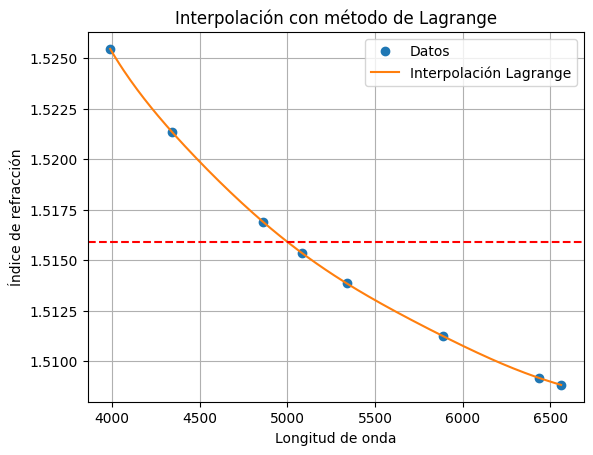

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Lagrange(x, y, x_interp):
  if len(x) != len(y):
    raise ValueError('x e y deben tener la misma longitud')
  if np.min(x) > np.min(x_interp) or np.max(x) < np.max(x_interp):
    raise ValueError('x_interp debe estar entre x')

  n = len(x)
  P = 0
  for i in range(n):
    l = 1
    for j in range(n):
      if i != j:
        l *= (x_interp - x[j]) / (x[i] - x[j])
    P += y[i] * l
  return P

# Datos experimentales
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Interpolación para un valor objetivo
l_objetivo = 5000
n_estimado = Lagrange(lambda_angstrom, indice_refraccion, l_objetivo)
print(f"Índice de refracción estimado con {l_objetivo}lambda es: {n_estimado:.4f}")

# Interpolación en muchos puntos
x_interp = np.linspace(min(lambda_angstrom), max(lambda_angstrom), 200)
y_interp = Lagrange(lambda_angstrom, indice_refraccion, x_interp)

# Gráfica
plt.plot(lambda_angstrom, indice_refraccion, 'o', label='Datos')
plt.plot(x_interp, y_interp, '-', label='Interpolación Lagrange')
plt.axhline(n_estimado, color='r',linestyle='--')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de refracción')
plt.title('Interpolación con método de Lagrange')
plt.legend()
plt.grid(True)
plt.show()
